# Chapter 1: Neural Networks Foundations

## Perceptron

f(x) is one if wx + b > 0 and 0 otherwise. Here w is a vector weights and b is a bias. wx + b, defines boundary hyperplane that changes position according to he values assigned to w and b.

### The first example of Keras code

The initial building block of Keras is a model, and the simplest model is called sequential.
A sequential Keras model is a linear pipeline (a stack) of neural networks layers. This code
fragment defines a single layer with 12 artificial neurons, and it expects 8 input variables
(also known as features):

In [0]:
# from keras.models import Sequential
# model = Sequential()
# model.add(Dense(12, input_dim=8, kernel_initializer='random_uniform'))

The choices for weights initialization:
- random_uniform: Weights are initialized to uniformly random small values in
(-0.05, 0.05). In other words, any value within the given interval is equally likely
to be drawn.
- random_normal: Weights are initialized according to a Gaussian, with a zero
mean and small standard deviation of 0.05.
- zero: All weights are initialized to zero.

## Multilayer Perceptron -- The First Example of a Network

The net is dense, meaning that each neuron in a layer is connected to all neurons located in the previous layer and to all the neurons in the following layer.

### Problems in training the perceptron and a solution

Ideally, we would like to provide a set of training examples and let the computer adjust the
weight and the bias in such a way that the errors produced in the output are minimized. The problem is perceptron is either on or off (one or zero), which makes it have a big output jump. Therefore we need something smoother, we need a function that progressively changes from 0 to 1 with no discontinuity.

### Activation function -- Sigmoid

$\sigma(x) = \frac{1}{1+e^{-x}}$

A neuron can use the sigmoid for computing the nonlinear function $\sigma(z = wx + b)$. Note that sigmoid function for very large number will close to one and for very large and negative number the function will close to zero. In other words, a neuron with sigmoid activation has a behavior similar to perceptron, but the changes are gradual. It can answer maybe.

### Activation function -- ReLU

Defined as f(x) = max(0, x)

### Activation functions

Sigmoid and ReLU are generally called activation functions in neural network jargon. In the
Testing different optimizers in Keras section, we will see that those gradual changes, typical of
sigmoid and ReLU functions, are the basic building blocks to developing a learning
algorithm which adapts little by little, by progressively reducing the mistakes made by our
nets.

## A Real Example -- Recognizing Handwritten Digits

### One-hot-encoding -- OHE

In many applications, it is convenient to transform categorical (non-numerical) features into
numerical variables. For instance, the categorical feature digit with the value d in [0-9] can
be encoded into a binary vector with 10 positions, which always has 0 value, except the d-th
position where a 1 is present. This type of representation is called one-hot encoding (OHE)
and is very common in data mining when the learning algorithm is specialized for dealing
with numerical functions.

### Defining a simple neural net in Keras

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # the number of outputs == number of digits
OPTIMIZER = SGD() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.1 # how much train is reserved for validation

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train is 6000 rows of 28 by 28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255

print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# convert class vectors to binary matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
60000 train samples
10000 test samples


The input layer has a neuron associated with each pixel in the image for a total of 28 x 28 =
784 neurons, one for each pixel in the MNIST images.


Typically, the values associated with each pixel are normalized in the range [0, 1] (which
means that the intensity of each pixel is divided by 255, the maximum intensity value). The
output is 10 classes, one for each digit.


The final layer is a single neuron with activation function softmax, which is a generalization
of the sigmoid function. Softmax squashes a k-dimensional vector of arbitrary real values
into a k-dimensional vector of real values in the range (0, 1). In our case, it aggregates 10
answers provided by the previous layer with 10 neurons:

In [3]:
# 10 outputs final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


There are a few choices to be made during compilation:
- Select the optimizer: algorithm to update the weights
- Select the objective function (loss function): used by the optimizer to navigate
the space of weights
- Evaluate the trained model

Common choices for the objective function:
- MSE: Mean squared error. $MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y} - y)^2$
- Binary cross-entropy: Binary logarithmic loss. Suitable for binary labels prediction. $Log\:Loss = -t\,log(p) - (1 - t)\,log(1 - p)$. The prediction is p and the target is t.
- Categorical cross-entropy: Multiclass logarithmic loss. Suitable for multiclass label predictions. It is also the default choice in association with softmax activation. $L_i = -\sum_j\,t_{i,j}\,log(p_{i,j})$. Where the target is t and prediction is p.

Common choices for metrics (used for evaluating the model):
- Accuracy: the proportion of correct predictions with respect to the targets
- Precision: denotes how many selected items are relevant for a multilabel
classification
- Recall: denotes how many selected items are relevant for a multilabel
classification

In [4]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, 
              metrics=['accuracy'])

Parameters for fit method:
- epochs: This is the number of times the model is exposed to the training set. At
each iteration, the optimizer tries to adjust the weights so that the objective
function is minimized.
- batch_size: This is the number of training instances observed before the
optimizer performs a weight update.

In [7]:
# training the model
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 1s 21us/step - loss: 0.3091 - acc: 0.9137 - val_loss: 0.2579 - val_acc: 0.9297
Epoch 2/200
54000/54000 [==============================] - 1s 21us/step - loss: 0.3085 - acc: 0.9135 - val_loss: 0.2574 - val_acc: 0.9293
Epoch 3/200
54000/54000 [==============================] - 1s 21us/step - loss: 0.3079 - acc: 0.9140 - val_loss: 0.2571 - val_acc: 0.9297
Epoch 4/200
54000/54000 [==============================] - 1s 21us/step - loss: 0.3074 - acc: 0.9139 - val_loss: 0.2567 - val_acc: 0.9300
Epoch 5/200
54000/54000 [==============================] - 1s 20us/step - loss: 0.3069 - acc: 0.9142 - val_loss: 0.2563 - val_acc: 0.9300
Epoch 6/200
54000/54000 [==============================] - 1s 20us/step - loss: 0.3064 - acc: 0.9141 - val_loss: 0.2560 - val_acc: 0.9295
Epoch 7/200
54000/54000 [==============================] - 1s 21us/step - loss: 0.3059 - acc: 0.9146 - val_loss: 0.2556 - v

In [10]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Train accuracy: ", score[1])

10000/10000 [==============================] - 0s 35us/step
Test score:  0.2716841029793024
Train accuracy:  0.9224


### Improving the simple net in Keras with hidden layers

A first improvement is to add additional layers to our network. So, after the input layer, we
have a first dense layer with the N_HIDDEN neurons and an activation function ReLU. This
additional layer is considered hidden because it is not directly connected to either the input
or the output. After the first hidden layer, we have a second hidden layer, again with
the N_HIDDEN neurons, followed by an output layer with 10 neurons, each of which will fire
when the relative digit is recognized. The following code defines this new network:

In [12]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # the number of outputs == number of digits
OPTIMIZER = SGD() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.1 # how much train is reserved for validation

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train is 6000 rows of 28 by 28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255

print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# convert class vectors to binary matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# build the model
model = Sequential()
model.add(Dense(N_HIDDEN , input_shape=(RESHAPED, )))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, 
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, epochs=NB_EPOCH, batch_size=BATCH_SIZE,
                    validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

# model evaluation
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])


60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________

### Further improving the simple net in Keras with dropout

The second improvement is to randomly drop with the dropout probability some of the values propagated inside our internal dense network of hidden layers.

In [2]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # the number of outputs == number of digits
OPTIMIZER = SGD() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.1 # how much train is reserved for validation
DROPOUT = 0.3

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train is 6000 rows of 28 by 28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255

print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# convert class vectors to binary matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# build the model
model = Sequential()
model.add(Dense(N_HIDDEN , input_shape=(RESHAPED, )))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, 
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, epochs=NB_EPOCH, batch_size=BATCH_SIZE,
                    validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

# model evaluation
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])


Using TensorFlow backend.


11493376/11490434 [==============================] - 24s 2us/step
60000 train samples
10000 test samples




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
____________________________

Note that training accuracy should still be above the test accuracy, otherwise we are not training long enough.

In [3]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # the number of outputs == number of digits
OPTIMIZER = SGD() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.1 # how much train is reserved for validation
DROPOUT = 0.3

# build the model
model = Sequential()
model.add(Dense(N_HIDDEN , input_shape=(RESHAPED, )))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, 
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, epochs=NB_EPOCH, batch_size=BATCH_SIZE,
                    validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

# model evaluation
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

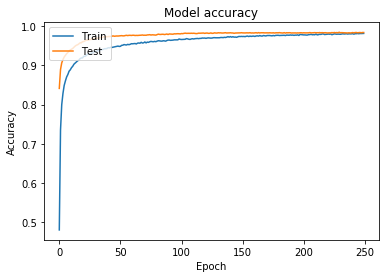

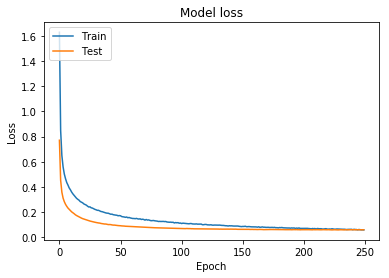

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Testing different optimizers in Keras

Gradient Descent Algorithms:
$w = w - \eta\,(\frac{\partial C}{\partial w})$. The eta $\eta$ is the learning rate, if to small the process will be slow and if too high, the process will probably miss the minimum loss value. Where C is the cost function or loss function.

Once we have the derivative, it is possible to optimize the nets with a gradient descent
technique. Keras uses its backend (either TensorFlow or Theano) for computing the
derivative on our behalf so we don't need to worry about implementing or computing it.
We just choose the activation function, and Keras computes its derivative on our behalf.

Keras implements a fast variant of gradient descent known as stochastic gradient descent
(SGD) and two more advanced optimization techniques known as RMSprop and Adam.
RMSprop and Adam include the concept of momentum (a velocity component) in addition
to the acceleration component that SGD has. This allows faster convergence at the cost of
more computation.

In [10]:
from keras.optimizers import RMSprop, Adam

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # the number of outputs == number of digits
OPTIMIZER = RMSprop() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.1 # how much train is reserved for validation
DROPOUT = 0.3

# build the model
model = Sequential()
model.add(Dense(N_HIDDEN , input_shape=(RESHAPED, )))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, 
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, epochs=NB_EPOCH, batch_size=BATCH_SIZE,
                    validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

# model evaluation
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

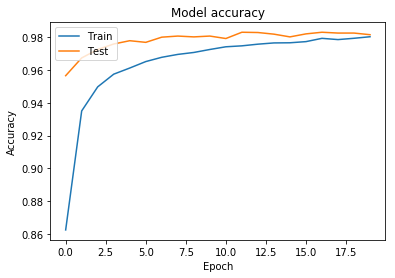

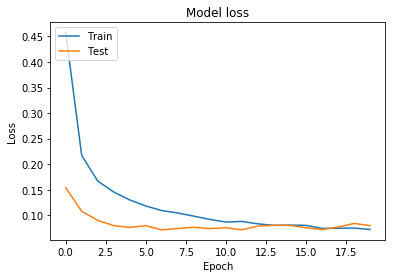

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
from keras.optimizers import RMSprop, Adam

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # the number of outputs == number of digits
OPTIMIZER = Adam() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.1 # how much train is reserved for validation
DROPOUT = 0.3

# build the model
model = Sequential()
model.add(Dense(N_HIDDEN , input_shape=(RESHAPED, )))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, 
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, epochs=NB_EPOCH, batch_size=BATCH_SIZE,
                    validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

# model evaluation
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

### Increasing the number of epochs

Learning is more about adopting smart techniques and not necessarily about the time spent in computations.

Another technique to improve the performance:
- Controlling the optimizer learning rate: Find the sweet spot between low and high value for learning rate
- Increasing the number of internal hidden neurons: Will increase the training time and parameters to update.
- Increasing the size of the batch computation

### Adopting regularization for avoiding overfitting

min : {loss(Training Data | Model)}

As a rule of thumb, if during the training we see that the loss increases on validation, after
an initial decrease, then we have a problem of model complexity that overfits training.
Indeed, overfitting is the word used in machine learning for concisely describing this
phenomenon.

We can use a hyperparameter lambda >= 0 for controlling what the importance of having
a simple model is, as in this formula:

min: {loss(Training data|model)} + lambda * complexity(model)


There are three different types of regularizations used in machine learning:
- L1 regularization (also known as lasso): The complexity of the model is
expressed as the sum of the absolute values of the weights
- L2 regularization (also known as ridge): The complexity of the model is
expressed as the sum of the squares of the weights
- Elastic net regularization: The complexity of the model is captured by a
combination of the two preceding techniques

Therefore, playing with regularization can be a good way to increase the performance of a
network, in particular when there is an evident situation of overfitting.

In [0]:
# # adding l2 regularization for kernel
# from keras import regularizers
# model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)))

### Hyperparameters tuning

Hyperparameters tuning is the process of finding the optimal combinations of those parameters that minimize cost functions.

### Predicting output

In [0]:
# # calculate predictions
# predictions = model.predict(X)

# # for a given input, several types of output can be computed, including a method:
# model.evaluate() # used to compute the loss values
# model.predict_classes() # used to compute category outputs
# model.predict_proba() # used to compute class probabilities

## A practical overview of backpropagation

In the beginning, all the weights have some random assignment. Then the net is activated
for each input in the training set: values are propagated forward from the input stage
through the hidden stages to the output stage where a prediction is made (note that we
have kept the following diagram simple by only representing a few values with green
dotted lines, but in reality, all the values are propagated forward through the network).

Since we know the true observed value in the training set, it is possible to calculate the error
made in prediction. The key intuition for backtracking is to propagate the error back and
use an appropriate optimizer algorithm, such as a gradient descent, to adjust the neural
network weights with the goal of reducing the error.

The features represent the input and the labels are here used to drive the learning process.
The model is updated in such a way that the loss function is progressively minimized. In a
neural network, what really matters is not the output of a single neuron but the collective
weights adjusted in each layer. Therefore, the network progressively adjusts its internal
weights in such a way that the prediction increases the number of labels correctly
forecasted. Of course, using the right set features and having a quality labeled data is
fundamental to minimizing the bias during the learning process.
